######################## BCB 546X: Python Assignment Details ########################

# ** Your Mission: Complete Python code in a Jupyter Notebook ** #

#-- Functions --#
## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
## 3. Write an alternative translation function.
## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
## 5. Write a function that computes the GC-content of each DNA sequence.

#-- In the MAIN part of the script --#
## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
## 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
#       a. What is the smallest penguin species? 
#       b. What is the geographical range of this species?
## 9. Plot a graph that shows the molecular weight as a function of GC content. 
## 10. Write the entire DataFrame to a new CSV file that includes your new columns.
## 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

#-- Additional Instructions (points will be deducted if these instructions are not heeded) --#
## ** Do all of this in a Jupyter notebook and push it to a GitHub repository.
## ** Your repository should not contain any files other than those associated with this assignment. 
## ** Read all comments carefully and answer the questions by including information in your Jupyter notebook.
## ** Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
## ** Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
## ** Commit and push your completed work in the Jupyter notebook to your repository.
## ** Submit the URL to your git repository via Canvas by the end of the day on May 6, 2022.

#-- Disclaimer --#
## Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.


######################## Python Translate Script ########################

## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work

In [10]:
!pip install pandas


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.5 MB 2.3 MB/s eta 0:00:05
    --------------------------------------- 0.2/11.5 MB 2.8 MB/s eta 0:00:05
   - -------------------------------------- 0.4/11.5 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/11.5 MB 3.5 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/11.5 MB 3.4 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.5 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.5 MB 3.1 MB/s eta 0:00:04
   ---- ----------------------------------- 1.2/11.5 MB 3.4 MB/s eta 0:00:04
   ----- ---------------------------------- 1.5/11.5 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/11.5 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.5 MB 3.6 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/11.5 MB 3.8 MB/s eta 0:00:03
   ---

In [11]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

## 1 ##
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.

In [12]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

    
    # Parses a FASTA file to extract DNA sequences and uses a part of the description
    # to associate each sequence with a specific species. Assumes that the species name
    # is the second and third word in the description of each sequence in the FASTA file.

    # Args:
    # fasta_fn (str): The file name or path to the FASTA file.

    # Returns:
    # dict: A dictionary where keys are species names (str) and values are sequences (Seq).
    

In [15]:
# Example usage of the function
fasta_file = "penguins_cytb.fasta"
sequences = get_sequences_from_file(fasta_file)

# Print the retrieved sequences along with their species names
for species, sequence in sequences.items():
    print(f"Species: {species}, Sequence: {sequence[:30]}...")  # Print the first 30 nucleotides for brevity

Species: Aptenodytes forsteri, Sequence: ATGGCCCCAAATCTCCGAAAATCCCATCCC...
Species: Aptenodytes patagonicus, Sequence: ATGGCCCCAAACCTCCGAAAATCCCATCCT...
Species: Eudyptes chrysocome, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCC...
Species: Eudyptes chrysolophus, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCC...
Species: Eudyptes sclateri, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCC...
Species: Eudyptula minor, Sequence: ATGGCCCCCAACCTCCGAAAATCTCACCCC...
Species: Pygoscelis adeliae, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCT...
Species: Pygoscelis antarctica, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCT...
Species: Pygoscelis papua, Sequence: ATGGCCCCCAACCTTCGAAAATCCCACCCT...
Species: Spheniscus demersus, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCT...
Species: Spheniscus humboldti, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCT...
Species: Spheniscus magellanicus, Sequence: ATGGCCCCCAACCTCCGAAAATCCCACCCT...


## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions

In [ ]:
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

In [3]:
!pip install biopython


     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 651.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.7 MB 3.0 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.7 MB 4.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.7 MB 6.9 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.7 MB 8.7 MB/s eta 0:00:01
   ---------------------------------- ----- 2.3/2.7 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 10.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   -- ------------------------------------- 0.9/15.5 MB 29.4 MB/s eta 0:00:01
   ---- ------------

In [5]:
from Bio.Data import CodonTable


In [7]:
from Bio.Data import CodonTable

def translate_function(string_nucleotides):
    
    mito_table = CodonTable.unambiguous_dna_by_name['Vertebrate Mitochondrial']
    aa_seq_string = ''
    
    # Iterate over the string in steps of 3 to get each codon
    for i in range(0, len(string_nucleotides) - len(string_nucleotides) % 3, 3):
        codon = string_nucleotides[i:i+3]
        if i + 3 >= len(string_nucleotides) - 3 and codon in mito_table.stop_codons:
            continue  # Skip the stop codon at the end
        aa_seq_string += mito_table.forward_table.get(codon, '')
        
    return aa_seq_string


# Translates a DNA sequence into an amino acid sequence using the vertebrate mitochondrial codon table.

    # This function translates nucleotide sequences into their corresponding amino acid sequences
    # based on the "Vertebrate Mitochondrial" codon table from BioPython. It processes every three nucleotides
    # (codon) and converts them into amino acids. If a stop codon appears at the end of the sequence, it is not included
    # in the final amino acid sequence.

    # Args:
    # string_nucleotides (str): A string of nucleotides.

    # Returns:
    # str: A string representing the amino acid sequence.

In [10]:
# Example DNA sequences to test the translate_function
test_sequence1 = "ATGCGTATGTTTAAATAG"  # Contains a stop codon at the end
expected_result1 = "MRMFK"  # Expected amino acids, assuming you know the correct translation

# Call the translate_function and print the result
result1 = translate_function(test_sequence1)
print("Test Sequence 1 Results:")
print("Output:", result1)
print("Expected:", expected_result1)

Test Sequence 1 Results:
Output: MRMFK
Expected: MRMFK


## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.

In [23]:
from Bio.Seq import Seq
from Bio.Data import CodonTable

def translate_sequence(nucleotide_seq):
    
    #Translates a DNA sequence into an amino acid sequence using the vertebrate mitochondrial codon table.
    
    #This function utilizes BioPython's Seq object, which provides a high-level interface for biological sequences.
    #It automatically handles the translation according to the 'Vertebrate Mitochondrial' codon table and considers stop codons.

    #Args:
    #nucleotide_seq (str): A string of nucleotides.

    #Returns:
    #str: A string representing the amino acid sequence, excluding the final stop codon if present.
    
    dna_seq = Seq(nucleotide_seq)
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    # Translate the sequence and remove the stop codon if it's at the end
    protein_seq = dna_seq.translate(table=mito_table, to_stop=True)
    
    return str(protein_seq)

# Example usage:
# dna_sequence = "ATGCGTATGTTTAAATAG"
# print(translate_sequence(dna_sequence))


In [18]:
# test function:
dna_sequence = "ATGCGTATGTTTAAATAG"
print(translate_sequence(dna_sequence))

MRMFK


## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

In [1]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
    
    # Calculates the molecular weight of an amino acid sequence.

    # This function uses BioPython's ProteinAnalysis to calculate the molecular weight of a given
    # amino acid sequence. It is important that the amino acid sequence does not contain any stop codons
    # as this could affect the calculation.

    # Args:
    # aa_seq (str): A string representing the amino acid sequence.

    # Returns:
    # float: The molecular weight of the amino acid sequence.
    
    analysis = ProteinAnalysis(aa_seq)
    return analysis.molecular_weight()

# Example usage:
# aa_sequence = "MRMF"
# print("Molecular Weight:", compute_molecular_weight(aa_sequence))


In [2]:
#test function

aa_sequence = "MRMF"
print("Molecular Weight:", compute_molecular_weight(aa_sequence))

Molecular Weight: 583.7668


## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.


#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#


In [20]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [3]:
def calculate_gc_content(seq):

    # Calculates the GC content of a DNA sequence.
    
    # The GC content is the percentage of nucleotides in a DNA sequence that are either Guanine (G) or Cytosine (C).
    # This function computes the GC content as a proportion (0 to 1) of the total sequence length, excluding any non-GC nucleotide bases.

    # Args:
    #seq (str): A string representing the DNA sequence.

    #Returns:
   #float: The proportion of the sequence that is composed of G and C nucleotides.
    
    g_count = seq.count('G')
    c_count = seq.count('C')
    gc_content = (g_count + c_count) / len(seq) if len(seq) > 0 else 0
    return gc_content

# Example usage:
# dna_sequence = "GCGCGCTATATAGCGC"
# print("GC Content:", calculate_gc_content(dna_sequence))


In [4]:
dna_sequence = "GCGCGCTATATAGCGC"
print("GC Content:", calculate_gc_content(dna_sequence))

GC Content: 0.625


## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

In [21]:
import pandas as pd
import numpy as np  # For using np.nan

# Assuming penguins_df is your existing DataFrame

# Add new columns with 'NaN' values
penguins_df['molecular weight'] = np.nan
penguins_df['GC content'] = np.nan

# Display the updated DataFrame to check the new columns
print(penguins_df.head())  # This prints the first few rows of the DataFrame


                   species   mass  molecular weight  GC content
0     Aptenodytes forsteri  28.00               NaN         NaN
1  Aptenodytes patagonicus  13.40               NaN         NaN
2      Eudyptes chrysocome   2.80               NaN         NaN
3    Eudyptes chrysolophus   4.50               NaN         NaN
4        Eudyptes sclateri   4.25               NaN         NaN


## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

In [24]:
# Assuming cytb_seqs is a dictionary with species names as keys and DNA sequences as values
for species, dna_seq in cytb_seqs.items():
    aa_seq = translate_sequence(dna_seq)  # Translate to amino acids
    mol_weight = compute_molecular_weight(aa_seq)  # Get molecular weight of the amino acid sequence
    gc_content = calculate_gc_content(dna_seq)  # Compute GC content of the DNA sequence

    # Update the DataFrame with the calculated values
    penguins_df.loc[penguins_df['species'] == species, 'molecular weight'] = mol_weight
    penguins_df.loc[penguins_df['species'] == species, 'GC content'] = gc_content

# Print the updated DataFrame to check results
print(penguins_df)

                    species   mass  molecular weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021    0.483815
1   Aptenodytes patagonicus  13.40        42563.7067    0.496938
2       Eudyptes chrysocome   2.80        42475.5753    0.511811
3     Eudyptes chrysolophus   4.50        42445.5493    0.509186
4         Eudyptes sclateri   4.25        42475.5753    0.508311
5           Eudyptula minor   1.60        42491.6408    0.492563
6        Pygoscelis adeliae   4.60        42458.6140    0.490814
7     Pygoscelis antarctica   4.10        42404.5423    0.477690
8          Pygoscelis papua   6.10        42595.8759    0.471566
9       Spheniscus demersus   3.20        42431.5490    0.482940
10     Spheniscus humboldti   4.75        42399.5520    0.492563
11  Spheniscus magellanicus   3.40        42459.6021    0.482065


## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

In [26]:
!pip install matplotlib


     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ------ ------------------------------ 30.7/162.8 kB 330.3 kB/s eta 0:00:01
     --------- --------------------------- 41.0/162.8 kB 330.3 kB/s eta 0:00:01
     ------------------ ------------------ 81.9/162.8 kB 459.5 kB/s eta 0:00:01
     --------------------------- -------- 122.9/162.8 kB 516.7 kB/s eta 0:00:01
     ------------------------------- ---- 143.4/162.8 kB 568.9 kB/s eta 0:00:01
     ------------------------------------ 162.8/162.8 kB 513.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB 660.6 kB/s eta 0:00:12
   ---------------------------------------- 0.1/7.7 MB 787.7 kB/s eta 0:00:10
 

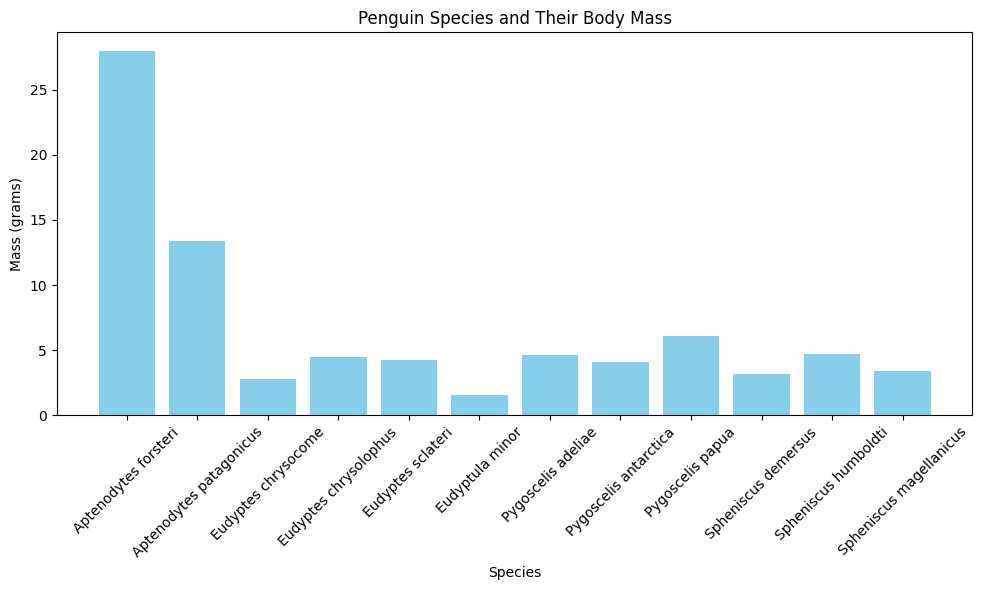

In [27]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(penguins_df['species'], penguins_df['mass'], color='skyblue')
plt.xlabel('Species')
plt.ylabel('Mass (grams)')
plt.title('Penguin Species and Their Body Mass')
plt.xticks(rotation=45)  # Rotate species names for better visibility
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


## *Q1* What is the smallest penguin species? 
ANS: Eudyptes minor
## *Q2* What is the geographical range of this species?
Australia and New Zealand